# Heatwave Frequency Analysis Notebook

In this notebook, we analyze the output of the heatwave frequency code. We plot the mean Z value in our simulations against the percentage of times where the daily max and mean temperature exceed both a static and dynamic baseline as the world warms. We also plot mean Z against the percentage of days where the soil moisture fails to meet the 5th percentile of the baseline. 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import xarray as xr 
import glob 
import matplotlib as mpl 

mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'

In [2]:
path = "../data/heatwave-freq-data/"
exceedence_filenames = glob.glob(path + "2-15-2022-*")
N_files = len(exceedence_filenames)
exceedence_filenames.sort()
exceedence_filenames

['/data/keeling/a/adammb4/heatwaves-physics/data/heatwave-freq-data/2-15-2022-ATL-dyn_exceedences.nc',
 '/data/keeling/a/adammb4/heatwaves-physics/data/heatwave-freq-data/2-15-2022-ATL-exceedences.nc',
 '/data/keeling/a/adammb4/heatwaves-physics/data/heatwave-freq-data/2-15-2022-DAL-dyn_exceedences.nc',
 '/data/keeling/a/adammb4/heatwaves-physics/data/heatwave-freq-data/2-15-2022-DAL-exceedences.nc',
 '/data/keeling/a/adammb4/heatwaves-physics/data/heatwave-freq-data/2-15-2022-NY-dyn_exceedences.nc',
 '/data/keeling/a/adammb4/heatwaves-physics/data/heatwave-freq-data/2-15-2022-NY-exceedences.nc',
 '/data/keeling/a/adammb4/heatwaves-physics/data/heatwave-freq-data/2-15-2022-SEA-dyn_exceedences.nc',
 '/data/keeling/a/adammb4/heatwaves-physics/data/heatwave-freq-data/2-15-2022-SEA-exceedences.nc',
 '/data/keeling/a/adammb4/heatwaves-physics/data/heatwave-freq-data/2-15-2022-SGP-dyn_exceedences.nc',
 '/data/keeling/a/adammb4/heatwaves-physics/data/heatwave-freq-data/2-15-2022-SGP-exceedenc

In [3]:
file_list = ["ATL", "DAL", "NY", "SEA", "SGP", "WIT"]
ds = xr.open_dataset(exceedence_filenames[0])
ds

<xarray.Dataset>
Dimensions:    (dewpt_T: 10)
Coordinates:
  * dewpt_T    (dewpt_T) float64 292.7 293.2 293.7 294.2 ... 296.2 296.7 297.2
Data variables:
    mean_Z     (dewpt_T) float64 ...
    Tmax_ex    (dewpt_T) float64 ...
    Tdaily_ex  (dewpt_T) float64 ...
    mdaily_ex  (dewpt_T) float64 ...

In [18]:
Zs = []
Tmax_exs = []
Tdaily_exs = []
mdaily_exs = []

for file in range(0, N_files):
    tmp_ds = xr.open_dataset(exceedence_filenames[file])
    tmp_Z = tmp_ds["mean_Z"].values
    tmp_Tmax = tmp_ds["Tmax_ex"].values
    tmp_Tdaily = tmp_ds["Tdaily_ex"].values
    tmp_mdaily = tmp_ds["mdaily_ex"].values
    
    Zs.append(tmp_Z)
    Tmax_exs.append(tmp_Tmax)
    Tdaily_exs.append(tmp_Tdaily)
    mdaily_exs.append(tmp_mdaily)
    
Tmax_exs

[array([ 3.62222222,  5.08888889,  6.48888889,  6.93333333, 11.02222222,
        12.33333333, 16.02222222, 21.31111111, 24.31111111, 27.86666667]),
 array([ 5.        ,  7.24444444,  8.97777778, 10.82222222, 14.75555556,
        16.84444444, 20.71111111, 26.26666667, 28.77777778, 34.37777778]),
 array([ 3.08888889,  2.91111111,  4.44444444,  5.57777778,  7.2       ,
        11.13333333, 13.64444444, 15.6       , 19.26666667, 23.48888889]),
 array([ 5.        ,  6.77777778,  7.42222222,  9.44444444, 11.57777778,
        13.53333333, 18.57777778, 23.26666667, 26.84444444, 31.11111111]),
 array([ 3.77777778,  4.46666667,  5.26666667,  5.8       ,  7.17777778,
         8.77777778,  9.06666667, 11.33333333, 12.2       , 17.08888889]),
 array([ 5.        ,  5.82222222,  7.15555556,  8.33333333,  9.2       ,
        12.62222222, 12.55555556, 14.66666667, 16.75555556, 19.15555556]),
 array([ 3.37777778,  4.46666667,  6.        ,  6.26666667,  7.75555556,
        10.24444444, 10.55555556, 14.33

### Static baseline

The 95th percentile is not incremented by the amount of global warming.

/data/keeling/a/adammb4/heatwaves-physics/data/heatwave-freq-data/2-15-2022-ATL-exceedences.nc ATL
/data/keeling/a/adammb4/heatwaves-physics/data/heatwave-freq-data/2-15-2022-DAL-exceedences.nc DAL
/data/keeling/a/adammb4/heatwaves-physics/data/heatwave-freq-data/2-15-2022-NY-exceedences.nc NY
/data/keeling/a/adammb4/heatwaves-physics/data/heatwave-freq-data/2-15-2022-SEA-exceedences.nc SEA
/data/keeling/a/adammb4/heatwaves-physics/data/heatwave-freq-data/2-15-2022-SGP-exceedences.nc SGP
/data/keeling/a/adammb4/heatwaves-physics/data/heatwave-freq-data/2-15-2022-WIT-exceedences.nc WIT


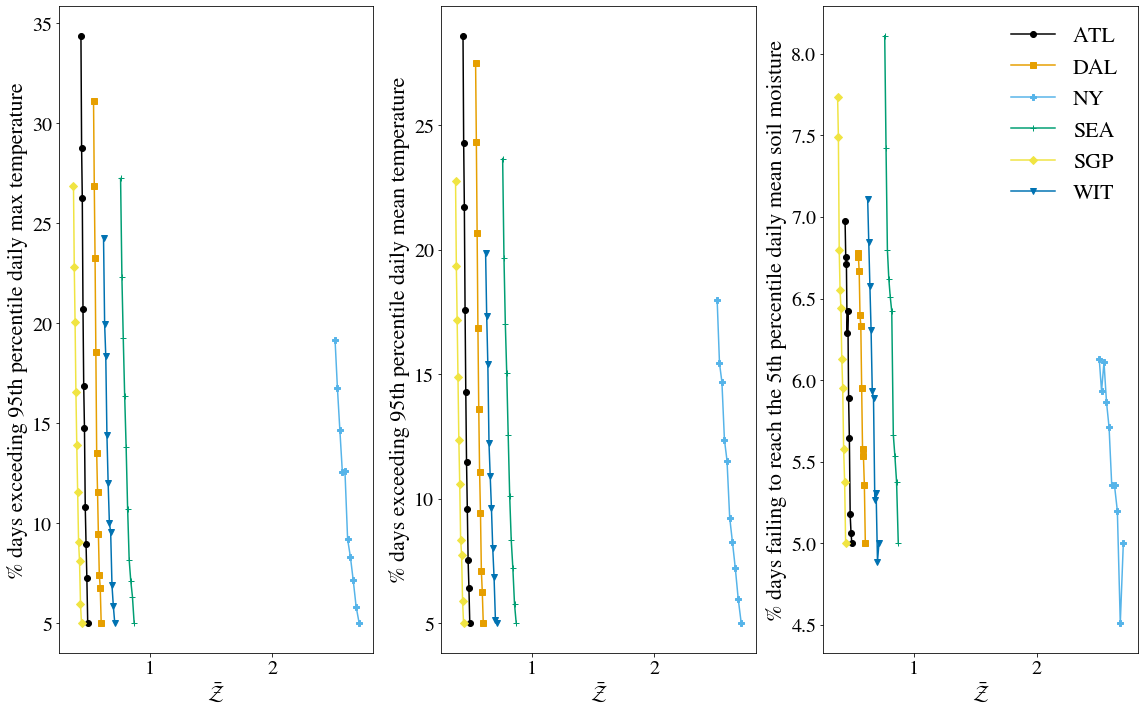

In [5]:
# plot results 
color_list = ['#000000', '#E69F00', '#56B4E9', '#009E73', '#F0E442', '#0072B2', '#D55E00', '#CC79A7']
marker_list = ['o', 's', 'P', '+', 'D', 'v', '3']
fontsize = 22
labelsize = 20
figsize = (16, 10)

fig, ax = plt.subplots(1, 3, figsize=figsize)

for file in range(0, N_files//2):
    index = 2 * file + 1
    print(exceedence_filenames[index], file_list[file])
    ax[0].plot(Zs[index], Tmax_exs[index], color=color_list[file], marker=marker_list[file], label=file_list[file])
    ax[1].plot(Zs[index], Tdaily_exs[index], color=color_list[file], marker=marker_list[file], label=file_list[file])
    ax[2].plot(Zs[index], mdaily_exs[index], color=color_list[file], marker=marker_list[file], label=file_list[file])
    
ax[0].set_ylabel("% days exceeding 95th percentile daily max temperature", fontsize=fontsize)
ax[1].set_ylabel("% days exceeding 95th percentile daily mean temperature", fontsize=fontsize)
ax[2].set_ylabel("% days failing to reach the 5th percentile daily mean soil moisture", fontsize=fontsize)
ax[2].legend(frameon=False, fontsize=fontsize)

for plot in range(0, 3):
    ax[plot].tick_params(axis='both', labelsize=labelsize)
    ax[plot].set_xlabel(r"$\bar{\mathcal{Z}}$", fontsize=fontsize)
    
fig.tight_layout()

#### Log Z scale

/data/keeling/a/adammb4/heatwaves-physics/data/heatwave-freq-data/2-15-2022-ATL-exceedences.nc ATL
/data/keeling/a/adammb4/heatwaves-physics/data/heatwave-freq-data/2-15-2022-DAL-exceedences.nc DAL
/data/keeling/a/adammb4/heatwaves-physics/data/heatwave-freq-data/2-15-2022-NY-exceedences.nc NY
/data/keeling/a/adammb4/heatwaves-physics/data/heatwave-freq-data/2-15-2022-SEA-exceedences.nc SEA
/data/keeling/a/adammb4/heatwaves-physics/data/heatwave-freq-data/2-15-2022-SGP-exceedences.nc SGP
/data/keeling/a/adammb4/heatwaves-physics/data/heatwave-freq-data/2-15-2022-WIT-exceedences.nc WIT


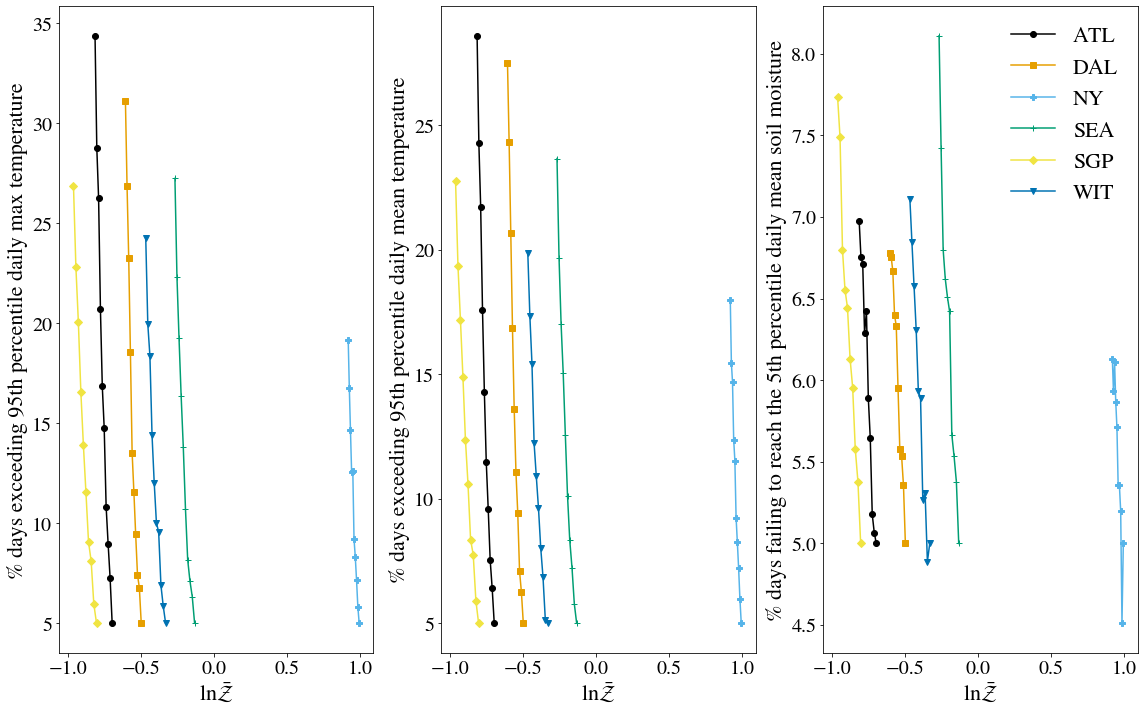

In [6]:
# plot results 
color_list = ['#000000', '#E69F00', '#56B4E9', '#009E73', '#F0E442', '#0072B2', '#D55E00', '#CC79A7']
marker_list = ['o', 's', 'P', '+', 'D', 'v', '3']
fontsize = 22
labelsize = 20
figsize = (16, 10)

fig, ax = plt.subplots(1, 3, figsize=figsize)

for file in range(0, N_files//2):
    index = 2 * file + 1
    print(exceedence_filenames[index], file_list[file])
    ax[0].plot(np.log(Zs[index]), Tmax_exs[index], color=color_list[file], marker=marker_list[file], label=file_list[file])
    ax[1].plot(np.log(Zs[index]), Tdaily_exs[index], color=color_list[file], marker=marker_list[file], label=file_list[file])
    ax[2].plot(np.log(Zs[index]), mdaily_exs[index], color=color_list[file], marker=marker_list[file], label=file_list[file])
    
ax[0].set_ylabel("% days exceeding 95th percentile daily max temperature", fontsize=fontsize)
ax[1].set_ylabel("% days exceeding 95th percentile daily mean temperature", fontsize=fontsize)
ax[2].set_ylabel("% days failing to reach the 5th percentile daily mean soil moisture", fontsize=fontsize)
ax[2].legend(frameon=False, fontsize=fontsize)

for plot in range(0, 3):
    ax[plot].tick_params(axis='both', labelsize=labelsize)
    ax[plot].set_xlabel(r"$\ln\bar{\mathcal{Z}}$", fontsize=fontsize)
    
fig.tight_layout()

### Dynamic baseline

The 95th percentile is incremented by the amount of global warming.

/data/keeling/a/adammb4/heatwaves-physics/data/heatwave-freq-data/2-15-2022-ATL-dyn_exceedences.nc ATL
/data/keeling/a/adammb4/heatwaves-physics/data/heatwave-freq-data/2-15-2022-DAL-dyn_exceedences.nc DAL
/data/keeling/a/adammb4/heatwaves-physics/data/heatwave-freq-data/2-15-2022-NY-dyn_exceedences.nc NY
/data/keeling/a/adammb4/heatwaves-physics/data/heatwave-freq-data/2-15-2022-SEA-dyn_exceedences.nc SEA
/data/keeling/a/adammb4/heatwaves-physics/data/heatwave-freq-data/2-15-2022-SGP-dyn_exceedences.nc SGP
/data/keeling/a/adammb4/heatwaves-physics/data/heatwave-freq-data/2-15-2022-WIT-dyn_exceedences.nc WIT


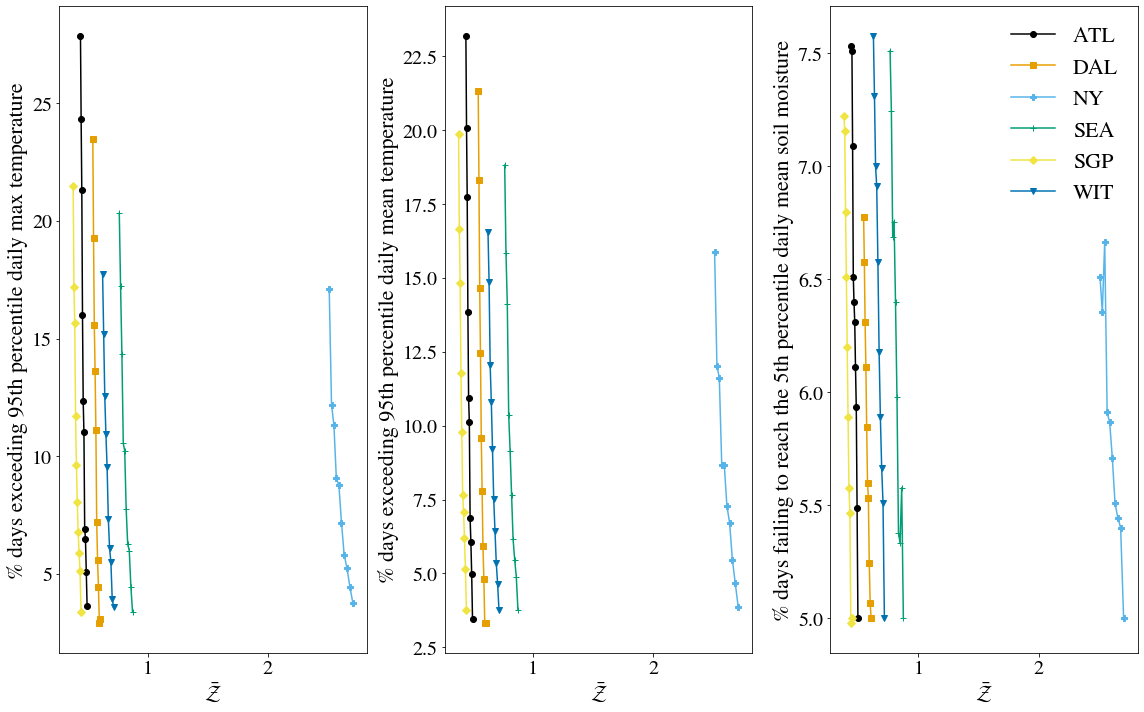

In [7]:
fig, ax = plt.subplots(1, 3, figsize=figsize)

for file in range(0, N_files//2):
    index = 2 * file 
    print(exceedence_filenames[index], file_list[file])
    ax[0].plot(Zs[index], Tmax_exs[index], color=color_list[file], marker=marker_list[file], label=file_list[file])
    ax[1].plot(Zs[index], Tdaily_exs[index], color=color_list[file], marker=marker_list[file], label=file_list[file])
    ax[2].plot(Zs[index], mdaily_exs[index], color=color_list[file], marker=marker_list[file], label=file_list[file])
    
ax[0].set_ylabel("% days exceeding 95th percentile daily max temperature", fontsize=fontsize)
ax[1].set_ylabel("% days exceeding 95th percentile daily mean temperature", fontsize=fontsize)
ax[2].set_ylabel("% days failing to reach the 5th percentile daily mean soil moisture", fontsize=fontsize)
ax[2].legend(frameon=False, fontsize=fontsize)

for plot in range(0, 3):
    ax[plot].tick_params(axis='both', labelsize=labelsize)
    ax[plot].set_xlabel(r"$\bar{\mathcal{Z}}$", fontsize=fontsize)
    
fig.tight_layout()

#### Log Z scale

/data/keeling/a/adammb4/heatwaves-physics/data/heatwave-freq-data/2-15-2022-ATL-dyn_exceedences.nc ATL
/data/keeling/a/adammb4/heatwaves-physics/data/heatwave-freq-data/2-15-2022-DAL-dyn_exceedences.nc DAL
/data/keeling/a/adammb4/heatwaves-physics/data/heatwave-freq-data/2-15-2022-NY-dyn_exceedences.nc NY
/data/keeling/a/adammb4/heatwaves-physics/data/heatwave-freq-data/2-15-2022-SEA-dyn_exceedences.nc SEA
/data/keeling/a/adammb4/heatwaves-physics/data/heatwave-freq-data/2-15-2022-SGP-dyn_exceedences.nc SGP
/data/keeling/a/adammb4/heatwaves-physics/data/heatwave-freq-data/2-15-2022-WIT-dyn_exceedences.nc WIT


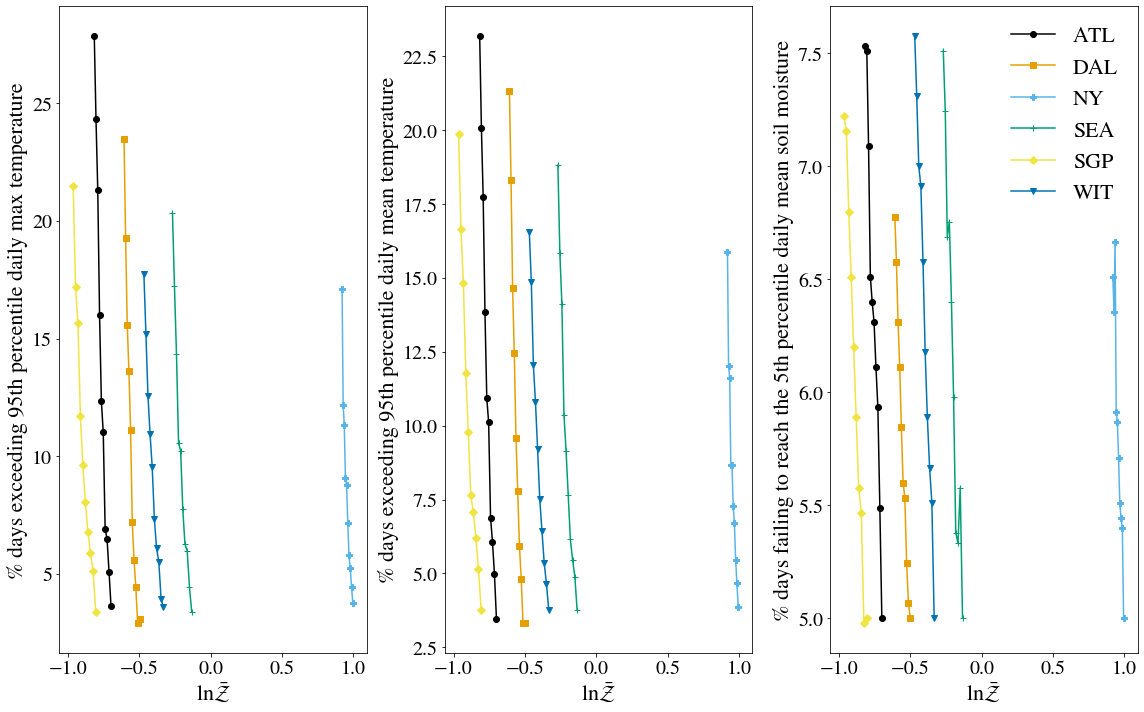

In [17]:
fig, ax = plt.subplots(1, 3, figsize=figsize)

for file in range(0, N_files//2):
    index = 2 * file 
    print(exceedence_filenames[index], file_list[file])
    ax[0].plot(np.log(Zs[index]), Tmax_exs[index], color=color_list[file], marker=marker_list[file], label=file_list[file])
    ax[1].plot(np.log(Zs[index]), Tdaily_exs[index], color=color_list[file], marker=marker_list[file], label=file_list[file])
    ax[2].plot(np.log(Zs[index]), mdaily_exs[index], color=color_list[file], marker=marker_list[file], label=file_list[file])
    
ax[0].set_ylabel("% days exceeding 95th percentile daily max temperature", fontsize=fontsize)
ax[1].set_ylabel("% days exceeding 95th percentile daily mean temperature", fontsize=fontsize)
ax[2].set_ylabel("% days failing to reach the 5th percentile daily mean soil moisture", fontsize=fontsize)
ax[2].legend(frameon=False, fontsize=fontsize)

for plot in range(0, 3):
    ax[plot].tick_params(axis='both', labelsize=labelsize)
    ax[plot].set_xlabel(r"$\ln\bar{\mathcal{Z}}$", fontsize=fontsize)
    
fig.tight_layout()

fig.savefig("figures/2-16-2022-exceedence-dynbaseline.png", dpi=400)
fig.savefig("../../docs/figdump/2-16-2022-exceedence-dynbaseline.png", dpi=400)

### Side-by-side comparison

Compare, side-by-side, the dynamic baseline and the static baseline simulations for each location.

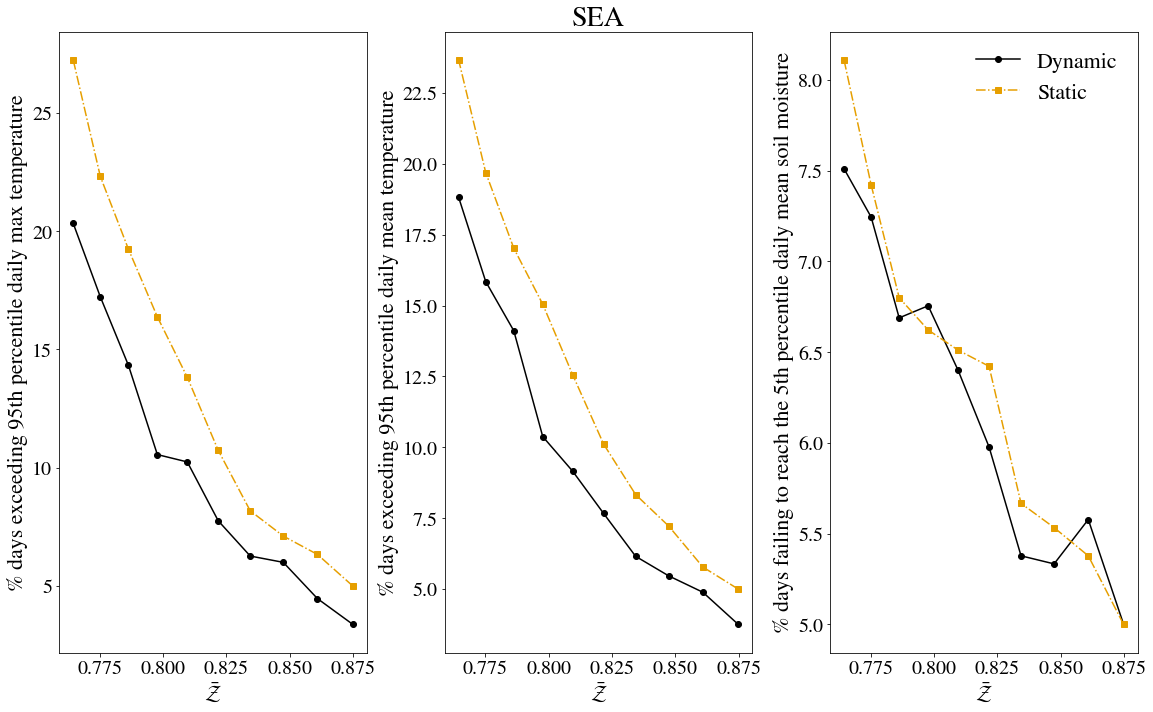

In [9]:
# location index: index of location (Follow file_list)

file_num = 3
location_index = 2 * file_num
dyn_index = location_index + 1

fig, ax = plt.subplots(1,3, figsize=figsize, sharex=True, sharey=False)

ax[0].plot(Zs[location_index], Tmax_exs[location_index], marker=marker_list[0], linestyle='solid', color=color_list[0], label="Dynamic")
ax[0].plot(Zs[location_index], Tmax_exs[dyn_index], marker=marker_list[1], linestyle='dashdot', color=color_list[1], label="Static")

ax[1].plot(Zs[location_index], Tdaily_exs[location_index], marker=marker_list[0], linestyle='solid', color=color_list[0], label="Dynamic")
ax[1].plot(Zs[location_index], Tdaily_exs[dyn_index], marker=marker_list[1], linestyle='dashdot', color=color_list[1], label="Static")
ax[1].set_title(file_list[file_num], fontsize=fontsize+6)

ax[2].plot(Zs[location_index], mdaily_exs[location_index], marker=marker_list[0], linestyle='solid', color=color_list[0], label="Dynamic")
ax[2].plot(Zs[location_index], mdaily_exs[dyn_index], marker=marker_list[1], linestyle='dashdot', color=color_list[1], label="Static")

ax[2].legend(frameon=False, fontsize=fontsize)
ax[0].set_ylabel("% days exceeding 95th percentile daily max temperature", fontsize=fontsize)
ax[1].set_ylabel("% days exceeding 95th percentile daily mean temperature", fontsize=fontsize)
ax[2].set_ylabel("% days failing to reach the 5th percentile daily mean soil moisture", fontsize=fontsize)

for i in range(0,3):
    ax[i].tick_params(axis="both", labelsize=labelsize)
    ax[i].set_xlabel(r"$\bar{\mathcal{Z}}$", fontsize=fontsize)
    
fig.tight_layout()

#### Log Z x-axis

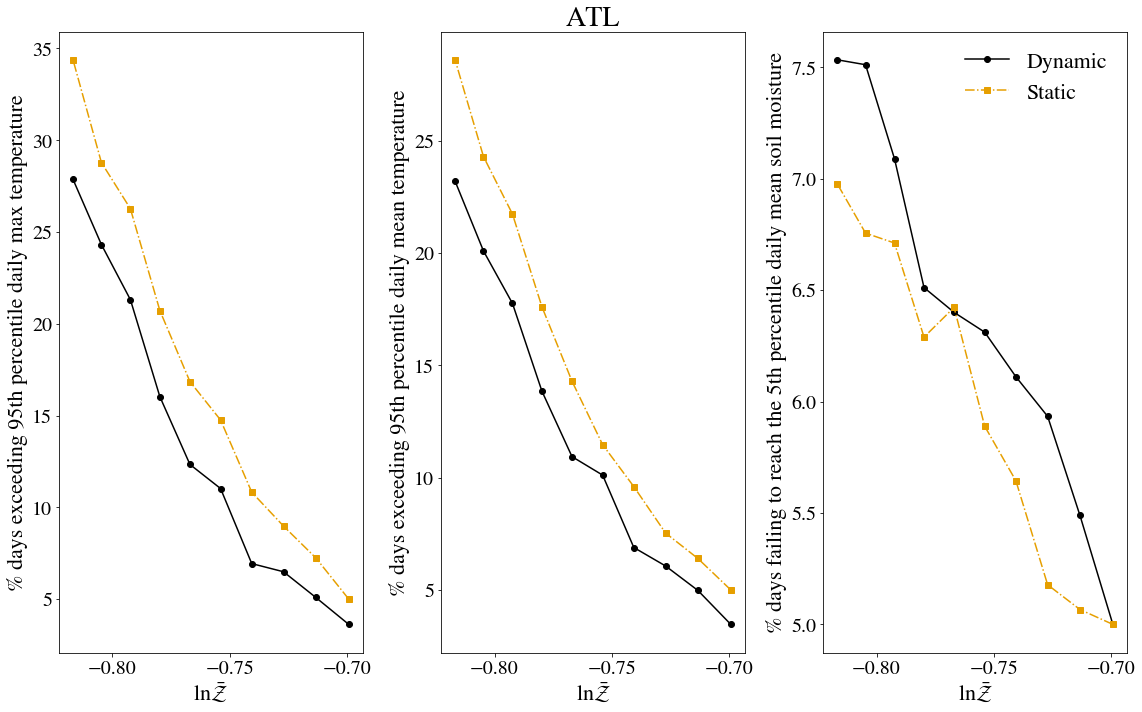

In [16]:
# location index: index of location (Follow file_list)

file_num = 0
location_index = 2 * file_num
dyn_index = location_index + 1

fig, ax = plt.subplots(1,3, figsize=figsize, sharex=True, sharey=False)

ax[0].plot(np.log(Zs[location_index]), Tmax_exs[location_index], marker=marker_list[0], linestyle='solid', color=color_list[0], label="Dynamic")
ax[0].plot(np.log(Zs[location_index]), Tmax_exs[dyn_index], marker=marker_list[1], linestyle='dashdot', color=color_list[1], label="Static")

ax[1].plot(np.log(Zs[location_index]), Tdaily_exs[location_index], marker=marker_list[0], linestyle='solid', color=color_list[0], label="Dynamic")
ax[1].plot(np.log(Zs[location_index]), Tdaily_exs[dyn_index], marker=marker_list[1], linestyle='dashdot', color=color_list[1], label="Static")
ax[1].set_title(file_list[file_num], fontsize=fontsize+6)

ax[2].plot(np.log(Zs[location_index]), mdaily_exs[location_index], marker=marker_list[0], linestyle='solid', color=color_list[0], label="Dynamic")
ax[2].plot(np.log(Zs[location_index]), mdaily_exs[dyn_index], marker=marker_list[1], linestyle='dashdot', color=color_list[1], label="Static")

ax[2].legend(frameon=False, fontsize=fontsize)
ax[0].set_ylabel("% days exceeding 95th percentile daily max temperature", fontsize=fontsize)
ax[1].set_ylabel("% days exceeding 95th percentile daily mean temperature", fontsize=fontsize)
ax[2].set_ylabel("% days failing to reach the 5th percentile daily mean soil moisture", fontsize=fontsize)

for i in range(0,3):
    ax[i].tick_params(axis="both", labelsize=labelsize)
    ax[i].set_xlabel(r"$\ln\bar{\mathcal{Z}}$", fontsize=fontsize)
    
fig.tight_layout()

### Precipitation check

Check to see if precipitation forcing was made properly.

In [11]:
precip_ds = xr.open_dataset(path+"precip_ts_50sumDAL.nc")

In [12]:
precip_ds

<xarray.Dataset>
Dimensions:  (time: 388800000)
Coordinates:
  * time     (time) int64 0 1 2 3 4 ... 388799996 388799997 388799998 388799999
Data variables:
    precip   (time) float64 ...

In [13]:
p = precip_ds["precip"].values

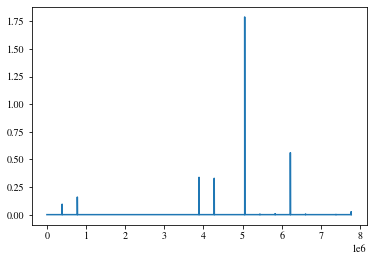

In [14]:
count = 16
i = 7776000
plt.plot(p[count * i: (count + 1) * i])

In [15]:
x = np.random.gamma(0.1, 1, 10**3)
np.shape(np.where(x > 1))

(1, 29)